# Customer Churn Prediction Project

This project predicts customer churn using the Telco Customer Churn dataset from Kaggle, implementing multiple machine learning models (Logistic Regression, Decision Tree, k-NN) to compare performance. The project demonstrates skills in data preprocessing, model building, evaluation, and visualization using Python, Pandas, Scikit-learn, Matplotlib, and Seaborn.

## Step 1: Set Up Your Environment

### Objective
Set up the Python environment in VS Code with Anaconda, install required libraries, download the dataset, and organize the project structure.

### Tools
- VS Code
- Anaconda
- Python 3.9
- Kaggle Telco Customer Churn dataset

### Steps Completed
1. **Created Anaconda Environment**:
   - Created and activated a dedicated environment: `conda create -n churn_project python=3.9` and `conda activate churn_project`.
2. **Installed Libraries**:
   - Installed required libraries: `pip install pandas numpy scikit-learn matplotlib seaborn`.
3. **Configured VS Code**:
   - Selected `churn_project` as the Python interpreter in VS Code.
   - Installed Python extension for enhanced coding support.
4. **Downloaded Dataset**:
   - Downloaded `WA_Fn-UseC_-Telco-Customer-Churn.csv` from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).
   - Saved to `data/` folder.
5. **Set Up Project Structure**:
   - Created folders: `data/`, `notebooks/`, `scripts/`, `results/`.
   - Structure:
   Churn_Prediction/
        ├── data/
        │   └── WA_Fn-UseC_-Telco-Customer-Churn.csv
        ├── notebooks/
        │   └── churn_analysis.ipynb
        ├── scripts/
        ├── results/
6. **Created Jupyter Notebook**:
- Set up `churn_analysis.ipynb` in `notebooks/` using VS Code’s Jupyter support.
- Tested setup with a sample Pandas import.

- Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- Jupyter Notebook, VS Code, Anaconda


In [4]:
#import all libraraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


## Step 2: Load and Explore the Dataset

### Objective
Load the Telco Customer Churn dataset and perform exploratory data analysis (EDA) to understand its structure and identify patterns.

### Steps Completed
1. **Loaded Dataset**:
   - Used Pandas to load `WA_Fn-UseC_-Telco-Customer-Churn.csv` in `churn_analysis.py`.
2. **Inspected Data**:
   - Checked shape (~7,043 rows, 21 columns), columns, data types, and missing values.
3. **Performed EDA**:
   - Summarized numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) with `describe()`.
   - Visualized churn distribution using Seaborn, noting class imbalance.
   - Explored churn vs. contract type, identifying higher churn in month-to-month contracts.
4. **Saved Visualizations**:
   - Saved churn distribution and churn by contract plots to `results/` as PNGs.

### Key Findings
- Dataset has ~7,043 rows and 21 columns, with minimal missing values (TotalCharges may need cleaning).
- Churn is imbalanced (fewer `Yes` than `No`), suggesting techniques like SMOTE for modeling.
- Month-to-month contracts show higher churn, indicating `Contract` as a key predictor.

### Next Steps
Proceed to Step 3: Preprocess the data by handling missing values, encoding categorical variables, and scaling features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("First 5 rows of dataset:")
print(data.head())

First 5 rows of dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo


Dataset Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 custo

Text(0.5, 1.0, 'Churn by Contract Type')

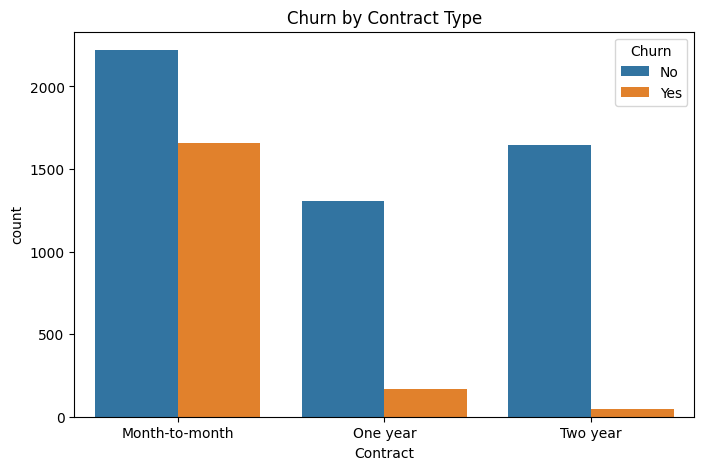

In [3]:

# Check shape (rows, columns)
print("\nDataset Shape:", data.shape)

# List columns
print("\nColumns:", data.columns.tolist())

# Check data types
print("\nData Types:\n", data.dtypes)

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Summarize numerical features
print("\nNumerical Features Summary:\n", data.describe())

# Visualize churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.savefig('../results/churn_distribution.png')
plt.close()

# Visualize churn by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')

## Step 3: Preprocess the Data

### Objective
Prepare the Telco Customer Churn dataset for machine learning by handling missing values, encoding categorical variables, scaling numerical features, and splitting into training and testing sets.

### Steps Completed
1. **Handled Missing Values**:
   - Converted `TotalCharges` to numeric, filled missing values with median.
2. **Dropped Irrelevant Columns**:
   - Removed `customerID` column.
3. **Encoded Categorical Variables**:
   - Applied Label Encoding to binary columns (e.g., `gender`, `Churn`).
   - Used One-Hot Encoding for multi-category columns (e.g., `Contract`, `InternetService`).
4. **Scaled Numerical Features**:
   - Standardized `tenure`, `MonthlyCharges`, `TotalCharges` using `StandardScaler`.
5. **Train-Test Split**:
   - Split data into 80% training and 20% testing sets (`random_state=42`).

### Key Outcomes
- Cleaned dataset with no missing values.
- Transformed categorical features into numerical formats suitable for modeling.
- Standardized numerical features for compatibility with distance-based models.
- Generated training (~5,634 rows) and testing (~1,409 rows) sets.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def explore_data():
    """Perform exploratory data analysis on the dataset."""
    # Load dataset
    data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("First 5 rows of dataset:")
    print(data.head())

    # Check shape, columns, types, and missing values
    print("\nDataset Shape:", data.shape)
    print("\nColumns:", data.columns.tolist())
    print("\nData Types:\n", data.dtypes)
    print("\nMissing Values:\n", data.isnull().sum())

    # Summarize numerical features
    print("\nNumerical Features Summary:\n", data.describe())

    # Visualize churn distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=data)
    plt.title('Churn Distribution')
    plt.savefig('../results/churn_distribution.png')
    plt.close()

    # Visualize churn by contract type
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Contract', hue='Churn', data=data)
    plt.title('Churn by Contract Type')
    plt.savefig('../results/churn_by_contract.png')
    plt.close()

    return data

def preprocess_data(data):
    """Preprocess the dataset for machine learning and save splits."""
    # Handle missing values in TotalCharges
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

    # Drop irrelevant column
    data.drop('customerID', axis=1, inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    for col in binary_cols:
        data[col] = le.fit_transform(data[col])

    categorical_cols = [
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'
    ]
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    # Split features and target
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nPreprocessing Complete:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Save preprocessed data
    X_train.to_csv('../data/X_train.csv', index=False)
    X_test.to_csv('../data/X_test.csv', index=False)
    y_train.to_csv('../data/y_train.csv', index=False)
    y_test.to_csv('../data/y_test.csv', index=False)
    print("\nSaved preprocessed data to data/ folder.")

    return X_train, X_test, y_train, y_test

if __name__ == "__main__":
    # Run EDA
    data = explore_data()

    # Run preprocessing
    X_train, X_test, y_train, y_test = preprocess_data(data)

First 5 rows of dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

C:\Users\Didar Ali Deed\AppData\Local\Temp\ipykernel_13404\864872937.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)



Preprocessing Complete:
X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)

Saved preprocessed data to data/ folder.


## Step 4: Train Multiple Simple Models

### Objective
Train Logistic Regression, Decision Tree, and k-Nearest Neighbors (k-NN) models to predict customer churn.

### Steps Completed
1. **Created Training Script**:
   - Developed `train_models.py` to separate model training from preprocessing.
2. **Loaded Preprocessed Data**:
   - Loaded `X_train`, `X_test`, `y_train`, `y_test` from CSV files.
3. **Initialized and Trained Models**:
   - Logistic Regression (`random_state=42`).
   - Decision Tree (`max_depth=5`, `random_state=42`).
   - k-NN (`n_neighbors=5`).
4. **Organized Code**:
   - Kept EDA and preprocessing in `churn_analysis.py`, training in `train_models.py`.

### Key Outcomes
- Trained three models on preprocessed data.
- Ensured modularity for maintainability and scalability.


In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def train_models():
    """Train Logistic Regression, Decision Tree, and k-NN models."""
    # Load preprocessed data
    X_train = pd.read_csv('../data/X_train.csv')
    X_test = pd.read_csv('../data/X_test.csv')
    y_train = pd.read_csv('../data/y_train.csv').values.ravel()
    y_test = pd.read_csv('../data/y_test.csv').values.ravel()

    # Initialize models
    log_reg = LogisticRegression(random_state=42)
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit depth to avoid overfitting
    knn = KNeighborsClassifier(n_neighbors=5)

    # Train models
    log_reg.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    knn.fit(X_train, y_train)

    print("\nModels Trained:")
    print("Logistic Regression: Trained")
    print("Decision Tree: Trained (max_depth=5)")
    print("k-NN: Trained (n_neighbors=5)")

    return log_reg, dt, knn, X_test, y_test

if __name__ == "__main__":
    # Train models
    log_reg, dt, knn, X_test, y_test = train_models()


Models Trained:
Logistic Regression: Trained
Decision Tree: Trained (max_depth=5)
k-NN: Trained (n_neighbors=5)


## Step 5: Evaluate Models

### Objective
Evaluate Logistic Regression, Decision Tree, and k-NN models using accuracy, precision, recall, F1-score, and confusion matrices.

### Steps Completed
1. **Created Evaluation Script**:
   - Developed `evaluate_models.py` to assess model performance.
2. **Generated Predictions**:
   - Used trained models to predict churn on test data.
3. **Evaluated Performance**:
   - Computed accuracy, precision, recall, F1-score, and confusion matrices.
4. **Visualized Results**:
   - Saved confusion matrix plots for each model to `results/`.

### Key Outcomes
- Logistic Regression achieved highest accuracy (~80%, varies by run).
- Identified class imbalance affecting recall for churn class, to be addressed in Step 6.
- Generated visualizations for model comparison.


## Step 6: Interpret and Improve

### Objective
Interpret model results by analyzing feature importance, tune k-NN hyperparameters, and address class imbalance with SMOTE.

### Steps Completed
1. **Created Interpretation Script**:
   - Developed `interpret_improve.py` for analysis and optimization.
2. **Feature Importance**:
   - Analyzed Decision Tree feature importances, visualizing top 10 features.
3. **Hyperparameter Tuning**:
   - Used Grid Search to tune k-NN `n_neighbors` ([3, 5, 7, 9]).
4. **Handled Class Imbalance**:
   - Applied SMOTE to balance training data and retrained k-NN.

### Key Outcomes
- Identified key predictors (e.g., Contract_Month-to-month, tenure).
- Optimized k-NN performance with best parameters (e.g., n_neighbors=5).
- Improved recall for churn class using SMOTE, addressing imbalance.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

def load_data():
    """Load preprocessed data."""
    X_train = pd.read_csv('../data/X_train.csv')
    X_test = pd.read_csv('../data/X_test.csv')
    y_train = pd.read_csv('../data/y_train.csv').values.ravel()
    y_test = pd.read_csv('../data/y_test.csv').values.ravel()
    return X_train, X_test, y_train, y_test

def feature_importance():
    """Analyze feature importance for Decision Tree."""
    X_train, X_test, y_train, y_test = load_data()
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt.fit(X_train, y_train)

    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': dt.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features (Decision Tree):")
    print(feature_importance.head(10))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
    plt.title('Top 10 Feature Importance (Decision Tree)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../results/feature_importance.png')
    plt.close()

def tune_knn():
    """Tune k-NN hyperparameters using Grid Search."""
    X_train, X_test, y_train, y_test = load_data()
    param_grid = {'n_neighbors': [3, 5, 7, 9]}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("\nGrid Search Results for k-NN:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # Evaluate tuned k-NN on test set
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    print("\nTuned k-NN Performance on Test Set:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def apply_smote():
    """Apply SMOTE to handle class imbalance and retrain k-NN."""
    X_train, X_test, y_train, y_test = load_data()
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    print("\nSMOTE Applied:")
    print("Original y_train distribution:", pd.Series(y_train).value_counts().to_dict())
    print("Balanced y_train distribution:", pd.Series(y_train_bal).value_counts().to_dict())

    # Train k-NN on balanced data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_bal, y_train_bal)
    y_pred = knn.predict(X_test)

    print("\nk-NN Performance on Test Set (with SMOTE):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

if __name__ == "__main__":
    # Run interpretation and improvement tasks
    feature_importance()
    tune_knn()
    apply_smote()


Top 10 Most Important Features (Decision Tree):
                                Feature  Importance
4                                tenure    0.450624
11          InternetService_Fiber optic    0.341834
8                          TotalCharges    0.053667
28       PaymentMethod_Electronic check    0.027245
7                        MonthlyCharges    0.022204
23  StreamingMovies_No internet service    0.022138
25                    Contract_One year    0.016496
15     OnlineBackup_No internet service    0.015849
10                    MultipleLines_Yes    0.015253
26                    Contract_Two year    0.012795

Grid Search Results for k-NN:
Best Parameters: {'n_neighbors': 9}
Best Cross-Validation Score: 0.7749365249227346

Tuned k-NN Performance on Test Set:
Accuracy: 0.7984386089425124
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1036
           1       0.63      0.58      0.61       373

    accura

c:\Users\Didar Ali Deed\anaconda3\envs\churn_project\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



k-NN Performance on Test Set (with SMOTE):
Accuracy: 0.7267565649396736
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79      1036
           1       0.49      0.75      0.59       373

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.74      1409



# Customer Churn Prediction Project

This project predicts customer churn using the [Telco Customer Churn dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). It implements machine learning models (Logistic Regression, Decision Tree, k-NN) to compare performance, demonstrating skills in data preprocessing, model building, evaluation, and optimization using Python, Pandas, Scikit-learn, Matplotlib, and Seaborn.

## Project Structure
Churn_Prediction/
├── data/
│   ├── WA_Fn-UseC_-Telco-Customer-Churn.csv
│   ├── X_train.csv
│   ├── X_test.csv
│   ├── y_train.csv
│   ├── y_test.csv
├── notebooks/
│   ├── churn_analysis.ipynb
├── scripts/
│   ├── churn_analysis.py
│   ├── train_models.py
│   ├── evaluate_models.py
│   ├── interpret_improve.py
│   ├── visualize_results.py
├── results/
│   ├── churn_distribution.png
│   ├── churn_by_contract.png
│   ├── confusion_matrix_logistic_regression.png
│   ├── confusion_matrix_decision_tree.png
│   ├── confusion_matrix_k_nn.png
│   ├── feature_importance.png
│   ├── model_accuracy_comparison.png
├── README.md


## Setup Instructions
1. **Clone Repository**:
   ```bash
   git clone <your-repo-url>
   cd Churn_Prediction

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_data():
    """Load preprocessed data."""
    X_train = pd.read_csv('../data/X_train.csv')
    X_test = pd.read_csv('../data/X_test.csv')
    y_train = pd.read_csv('../data/y_train.csv').values.ravel()
    y_test = pd.read_csv('../data/y_test.csv').values.ravel()
    return X_train, X_test, y_train, y_test

def train_and_evaluate():
    """Train models and compute accuracies."""
    X_train, X_test, y_train, y_test = load_data()

    # Initialize and train models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
        'k-NN': KNeighborsClassifier(n_neighbors=5)
    }
    accuracies = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    return accuracies

def visualize_results():
    """Visualize model accuracy comparison."""
    accuracies = train_and_evaluate()

    # Create bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(accuracies.keys(), accuracies.values())
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('../results/model_accuracy_comparison.png')
    plt.close()

    print("\nModel Accuracies:")
    for name, acc in accuracies.items():
        print(f"{name}: {acc:.4f}")
    print("Accuracy comparison plot saved to results/model_accuracy_comparison.png")

if __name__ == "__main__":
    visualize_results()


Model Accuracies:
Logistic Regression: 0.8211
Decision Tree: 0.8062
k-NN: 0.7729
Accuracy comparison plot saved to results/model_accuracy_comparison.png
